### 머신러닝
- 데이터를 기반으로 학습
- 과거 컴퓨터로 데이터 입력, 특징을 학습 패턴을 찾는 패턴인식

#### 식에 필요한 요소
- 무언가(x)로 무엇(y)를 예측하고 싶다!

    $$ f(x) = y $$

    - x : 독립변수(입력변수), 데이터 문제
    - y : 종속변수(출력변수), 정답
    - f : 머신러닝 모형(모델)

- 우리는 이때까지 f를 직접코딩했음. x값들 입력하면 y가 나오도록 개발
- 머신러닝/딥러닝 x, y를 다 입력해서 훈련을 시켜 함수f를 컴퓨터가 만들도록 하는 것

#### 데이터셋 분리
- 훈련을 시켜서 독립변수에 대한 종속변수가 도출되는 모델 만들 수 있음
- 100% 훈련에 사용하면 검증을 할 데이터 없음
- Train데이터으로 훈련 후 Test데이터로 실험. 또는 Train데이터로 훈련, Valid데이터 검증 후, Test데이터 실험

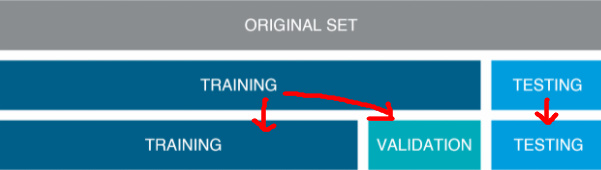

- 100%에서 Train과 Test 나눌때 7:3 또는 8:2 로 비율을 나눔

#### 사이킷런으로 타이타닉 생존자 예측

- 선형회귀 : 선형회귀에 대한 정의는 결론을 본 뒤 설명

- 사이킷런 설치
```python
!pip install scikit-learn
```

In [12]:
!pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 763.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.4 kB ? eta -:--:--
   ---------------------------------------- 78.4/78.4 kB 4.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# 분석, 시각화 라이브러리 사용/ 없으면 알아서 설치!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rc, font_manager
import warnings
import seaborn as sns
import time
from tqdm import tqdm  # 반복 진행 프로그레스바 모듈

In [14]:
## 영문으로 차트 사용시 설정
warnings.simplefilter('ignore') # 경고메시지 출력숨김

plt.rcParams['font.size'] = 12 # 글자크기
plt.rcParams['figure.figsize'] = (12, 4) # (W, H)
plt.rcParams['axes.grid'] = True # 차트 가로세로줄 표시

## 시본 설정
sns.set_theme(style='darkgrid', color_codes=True)

In [15]:
## Seaborn 팔레트 설정용 함수
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

- https://github.com/datasciencedojo/datasets/blob/master/titanic.csv 에서 통합 데이터 다운로드

In [16]:
## 사이킷런 임포트
from sklearn import preprocessing

##### 데이터 로드
- 타이타닉 데이터 캐글 사이트에서 다운로드
- https://www.kaggle.com/competitions/titanic/data

- Seaborn 데이터로드 기능(샘플데이터가 20개 정도)에 타이타닉 데이터 포함

In [18]:
## 타이타닉 훈련데이터
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
## Seaborn은 891개 데이터만 존재. 불필요한 중복컬럼 많음
## https://github.com/mwaskom/seaborn-data 나머지 데이터셋 정보
df_titanic = sns.load_dataset('titanic')
df_titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


- 데이터 컬럼 정의
    1. PassengerId: 탑승자 데이터 일련번호
    2. Survived: 생존여부 0사망 1생존
    3. Pclass: 티켓의 선실 등급 1일등석실, 2이등석실, 3삼등석실
    4. Name: 탑승자 명
    5. Sex: 성별 male남성, female여성
    6. Age: 나이
    7. SibSp: Sibling(형제), Spouse(배우자) 동반 형제와 배우자수
    8. Parch: Parent, Child 동반한 부모 또는 자녀 인원수
    9. Ticket: 티겟번호
    10. Fare: 티겟요금
    11. Cabin: 선실번호
    12. Embarked: 탑승 항구코드 C.herbourg, Q.ueenstown, S.outhhampton


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 데이터
    - 총 891개, 12개 컬럼, 2개의 float64, 5개 object(=string), 5개 int64

- 결측치(Null값)
    - Age 177개 
    - Cabin 687개
    - Embarked 2개

##### 데이터 전처리
- Age의 결측치 - 나이의 빈값은 평균치 입력
- Cabin의 결측치 - 2등석, 3등석 결측치 분포. 재검토
- Embarked의 결측치 - 탑승항구가 세군데. 그중에 가장 사람들이 많이 탄곳에서 탔을 거다!

In [21]:
# Age의 결측치
## 나이의 평균은 29.6923834 => 30.0
# round(df_train['Age'].mean())
df_train['Age'].fillna(round(df_train['Age'].mean()), inplace=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# NaN: Not a Number
df_train[df_train['Embarked'].isna()] # 61, 829

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [24]:
## Embarked
## value_counts() 결과는 max부터 내림차순으로 나오기때문에 
# df_train['Embarked'].value_counts().max()
# df_train['Embarked'].value_counts().index[0] # S
df_train['Embarked'].fillna(df_train['Embarked'].value_counts().index[0], inplace=True)

In [25]:
## 해당 인덱스 값만 추출
df_train.loc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [26]:
## Cabin 결측치는 컬럼을 삭제
df_train['Cabin'] 

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [27]:
# axis - 0행삭제, 1열삭제, inplace - 교체여부
df_train.drop(['Cabin'], axis=1, inplace=True)

In [28]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


##### 차트 시각화

In [29]:
## 성별, 생존자수 파악
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
['viridis', 'plasma', 'inferno', 'magma', 'cividis']    

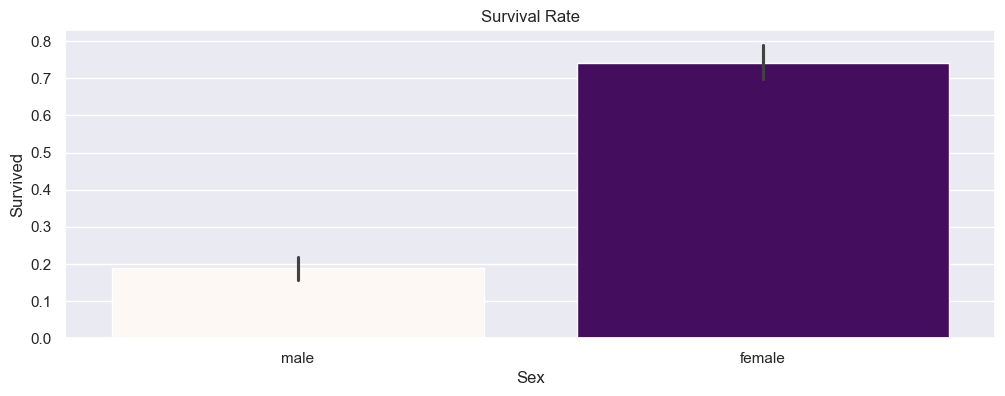

In [30]:
## Seaborn으로 시각화
sns.barplot(data=df_train, x='Sex', y='Survived', palette=colors_from_values(df_train['Survived'], 'RdPu'))
plt.title('Survival Rate')
plt.show()

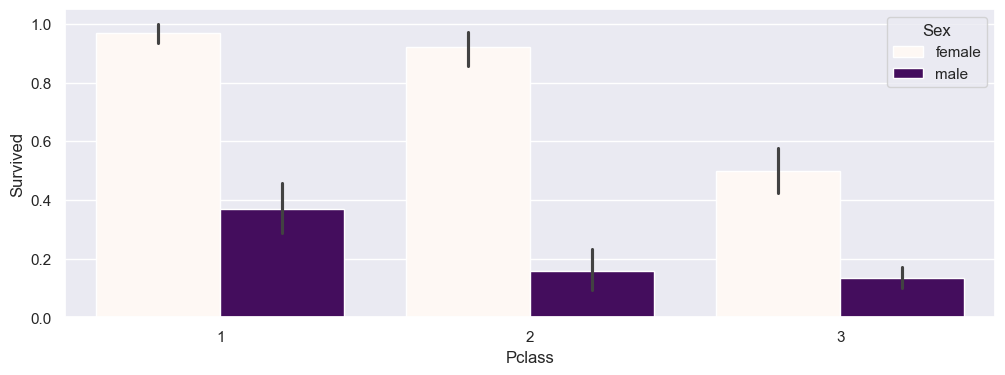

In [31]:
sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Sex', palette=colors_from_values(df_train['Survived'], 'RdPu'))
plt.show()

In [32]:
## 연령대 도출 함수
def get_ageGroup(age):
    cate = ''
    # if age <= -1: cate = 'Unknown'
    if age <= 5: cate = 'Baby'
    elif age <= 12: cate = 'Child'
    elif age <= 18: cate = 'Teenager'
    elif age <= 25: cate = 'Student'
    elif age <= 35: cate = 'Young Adult'
    elif age <= 60: cate = 'Adult'
    else: cate = 'Elderly'

    return cate

In [33]:
group_name = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

In [34]:
df_train['AgeGroup'] = df_train['Age'].apply(lambda x: get_ageGroup(x))

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


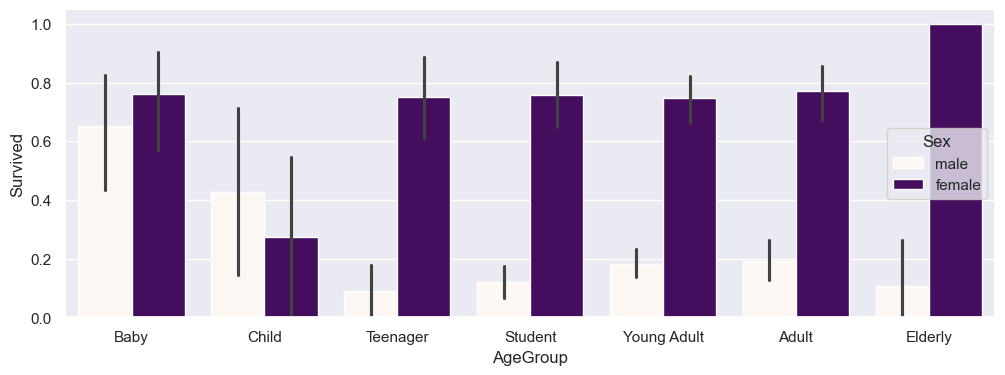

In [36]:
## 연령대로 바차트
sns.barplot(data=df_train, x='AgeGroup', y='Survived', hue='Sex', palette=colors_from_values(df_train['Survived'], 'RdPu'), order=group_name)
plt.show()

##### 문자열을 숫자로
- 문자(열)로 된 컬럼(Name, Ticket), 카테고리 컬럼(Sex, Embarked) 중 카테고리는 문자를 숫자로 변환가능
- 사이킷런 LabelEncoder클래스 사용

In [37]:
def encode_features(df):
    features = ['Sex', 'Embarked']
    for feat in features: # 두개의 컬럼을 반복해서
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feat]) # Sex, Embarked 컬럼값을 입력받아서 자동으로 카테고리 숫자화
        df[feat] = le.transform(df[feat]) # 기존값과 카테코리숫자를 비교해서 숫자로 변경

    return df

In [38]:
# 이전값 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


In [39]:
df_train = encode_features(df_train)

In [40]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Young Adult


##### 머신러닝으로 생존자 예측

- 독립변수(x) - 입력값 와 종속변수(y) - 정답으로 분리
- 독립변수 - Survived를 뺀 나머지. 훈련에 의미가 없을 컬럼(변수)도 삭제
- 종속변수 - Survived(생존여부)
- PassengerID와 같은 의미없는 변수를 추가하면 정확도가 떨어짐

In [41]:
## 종속변수 추출
y_df_titanic = df_train['Survived']
y_df_titanic.shape # 시리즈

(891,)

In [42]:
## 독립변수 추출
X_df_titanic = df_train.drop(['PassengerId', 'Name', 'Ticket', 'AgeGroup', 'Survived'], axis=1)
X_df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [43]:
## 데이터분리 891
## 기존 캐글 데이터는 훈련용 891, 실험용 418 개 따로 분리
## Seaborn 등에서는 891개의 데이터를 7:3으로 Train:Test 분리 작업을 해왔음
## 만약에 train_test_split 이 없으면
### 개발자가, DF 랜덤값으로 섞어주고, 판다스로 나누고, 독립변수, 종속변수 판다스 나누고
### 변수에 다 지정해줘야 함(엄청 시간이 많이걸리고 귀찮음)
from sklearn.model_selection import train_test_split

In [44]:
## 초기에 모두 섞은다음, 일치하는 독립변수와 종속변수를 알아서 해당변수에 입력해줌
## random_state는 본인마음. 0 ~ 41 사이의 숫자를 지정하면 됨
X_train, X_test, y_train, y_test = train_test_split(X_df_titanic, y_df_titanic, test_size=0.2, random_state=13)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 711 to 338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int32  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 38.9 KB


In [46]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 712 entries, 711 to 338
Series name: Survived
Non-Null Count  Dtype
--------------  -----
712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 736 to 815
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int32  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 9.8 KB


In [48]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 179 entries, 736 to 815
Series name: Survived
Non-Null Count  Dtype
--------------  -----
179 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


##### 사이킷런의 머신러닝 모델

In [49]:
from sklearn.linear_model import LinearRegression ## ML 선형회귀
from sklearn.linear_model import LogisticRegression ## ML 로지스틱회귀
from sklearn.tree import DecisionTreeClassifier  ## ML 결정트리
from sklearn.ensemble import RandomForestClassifier ## ML 랜덤포레스트 분류

from sklearn.metrics import  accuracy_score # 정확도 점수함수

In [50]:
## 선형회귀 모델 객체생성
lir_model = LinearRegression()
lir_model

LinearRegression()

In [51]:
## 훈련시작
lir_model.fit(X_train, y_train)

LinearRegression()

In [52]:
## 예측(실험) - 예측할 때는 정답을 안넣음
lir_pred = lir_model.predict(X_test)

In [53]:
y_test_fl = y_test.astype('float64')

In [54]:
pd.Series(lir_pred)

0      0.434141
1      0.190769
2      0.078711
3      0.134256
4      0.109640
         ...   
174    0.008678
175    0.874452
176    0.441953
177    0.754278
178    0.425226
Length: 179, dtype: float64

In [55]:
accuracy_score(y_true=y_test_fl, y_pred=lir_pred)
## 생존자 예측은 0/1 두개로 나뉨(분류)
## 분류에는 선형회귀 할 수 없음
## Classification metrics can't handle a mix of binary and continuous targets

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [56]:
## 로지스틱 회귀 모델 생성
lgr_model = LogisticRegression()
lgr_model

LogisticRegression()

In [57]:
## 훈련시작
lgr_model.fit(X_train, y_train)

LogisticRegression()

In [58]:
## 예측
lgr_pred = lgr_model.predict(X_test)

In [59]:
### 로지스틱 회귀 예측값 평가
print(f'로지스틱회귀 정확도 = {accuracy_score(y_true=y_test, y_pred=lgr_pred)}') 

로지스틱회귀 정확도 = 0.8324022346368715


In [60]:
y_pred = pd.DataFrame(lgr_pred)
y_pred.tail()

,0
174,0
175,1
176,0
177,1
178,0


In [61]:
y_test_df = y_test.to_frame()
y_test_df.tail()

,Survived
603,0
750,1
185,0
644,1
815,0


In [62]:
y_test_df.reset_index()

,index,Survived
0,736,0
1,421,0
2,442,0
3,196,0
4,200,0
...,...,...
174,603,0
175,750,1
176,185,0
177,644,1


In [63]:
y_result = pd.concat([y_test_df.reset_index(), y_pred], axis=1)

In [64]:
y_result.columns = ['Index', 'Suvived', 'Predicted']

In [65]:
y_result.to_csv('./data/titanic_suvived_comparsion.csv')

In [66]:
## 3등석, 남자고, 30살 -> 사망으로 예측가능
df_train.loc[286]

PassengerId                        287
Survived                             1
Pclass                               3
Name           de Mulder, Mr. Theodore
Sex                                  1
Age                               30.0
SibSp                                0
Parch                                0
Ticket                          345774
Fare                               9.5
Embarked                             2
AgeGroup                   Young Adult
Name: 286, dtype: object

#### 결론
- 머신러닝 기본에 회귀
- 측정된 값들로 규칙을 찾아내는 것

- 선형회귀 : 측정값을 참조하면 직선의 함수가 도출됨
    - 선형회귀는 1차 방정식 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/be/Normdist_regression.png?20080104184121" width="700">

- 로지스틱회귀 : 종속변수가 두 개의 클래스로 가지는 범주형일때 분류기법으로 사용하는 회귀
    - 로지스틱회귀는 시그모이드 함수

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png" width="700"
     style="background:white">


##### 파이토치로 생존자 예측

- 딥러닝을 사용해서 생존자 예측

In [67]:
## 파이토치 진행
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [68]:
## train과 test 데이터를 df_train, df_test
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [71]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [72]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


##### 데이터 전처리

- 불필요한 변수 삭제 - Name, Ticket, Cabin 삭제

In [73]:
df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [74]:
df_train.tail(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,889,0,3,female,NaN,1,2,23.45,S
889,890,1,1,male,26.0,0,0,30.00,C
890,891,0,3,male,32.0,0,0,7.75,Q


In [75]:
df_test.tail(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S
417,1309,3,male,NaN,1,1,22.3583,C


- 성별, 승선항구 인코딩(문자 -> 숫자)

In [76]:
df_train = encode_features(df_train)
df_test = encode_features(df_test)

In [77]:
df_train.tail(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
888,889,0,3,0,NaN,1,2,23.45,2
889,890,1,1,1,26.0,0,0,30.00,0
890,891,0,3,1,32.0,0,0,7.75,1


In [78]:
df_test.tail(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
415,1307,3,1,38.5,0,0,7.2500,2
416,1308,3,1,NaN,0,0,8.0500,2
417,1309,3,1,NaN,1,1,22.3583,0


- 결측치 처리
    - 나이, 선임의 NaN을 채워야함. 중간값이나 평균으로 채워넣음

In [79]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

##### 파이토치 학습 모델
- 신경망 생성

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/330px-Neural_network_example.svg.png" width="200" style="background:white">

- 신경망, 사람의 뇌의 뉴런과 유사하게 네트워크 구성
    - 입력층(input layer), 은닉층(hidden layer), 출력층(output layer)
    - 은닉층이 하나지만, 실제로 딥러닝을 할 때 은닉층을 여러층으로 나눠서 반복 학습을 실행
    - 은닉층이 많아지면 처리속도가 급감. 이때 활용하는 것이 GPU(CUDA)

- 모델링

- 활성화 함수 : 입력을 변환하는(출력값을 결정하는) 비선형 함수
    - Sign 함수
    - Sigmoid 함수
    - Tanh 함수
    - Softmax 함수
    - ReLU(Recified Linear Unit) 함수 - 로지스틱회귀 에 썻던 시그모이드보다 오차(경사사라짐) 줄어들게 만들 수있는 활성화함수로 개발

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/ReLU_and_Nonnegative_Soft_Thresholding_Functions.svg/1920px-ReLU_and_Nonnegative_Soft_Thresholding_Functions.svg.png" width="1020" style="background:white">

    - Leaky ReLU 함수

In [80]:
## 은닉충 2개, 2개 뉴런을 가지는 출력층 1개
class NeuralNet(nn.Module): # nn.Module이 부모클래스
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hlayer1 = nn.Sequential(
            nn.Linear(8, 512), # 8개의 입력을 512개로 분산(경우의수 늘리는 것)
            nn.ReLU(), ## 활성화 함수
            nn.Dropout(0.2) ## Overfitting 방지
        )

        self.hlayer2 = nn.Sequential(
            nn.Linear(512, 512), ## hlayer1의 출력이 512니까 입력도 512개 되어야 함
            nn.LeakyReLU(), ## 활성화 함수를 위에 Sin 이외 것들을 다 사용할 수 있음
            nn.Dropout(0.2)
        )

        self.olayer = nn.Linear(512, 2)

    def forward(self, x):
        x = self.hlayer1(x)
        x = self.hlayer2(x)
        x = self.olayer(x)
        return x

##### 스케쥴러

- 
- 